<a href="https://colab.research.google.com/github/realalyeasin/Machine-Learning/blob/main/%F0%9F%8C%B1Iris_Species_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as msno
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [ ]:
df = pd.read_csv('../input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

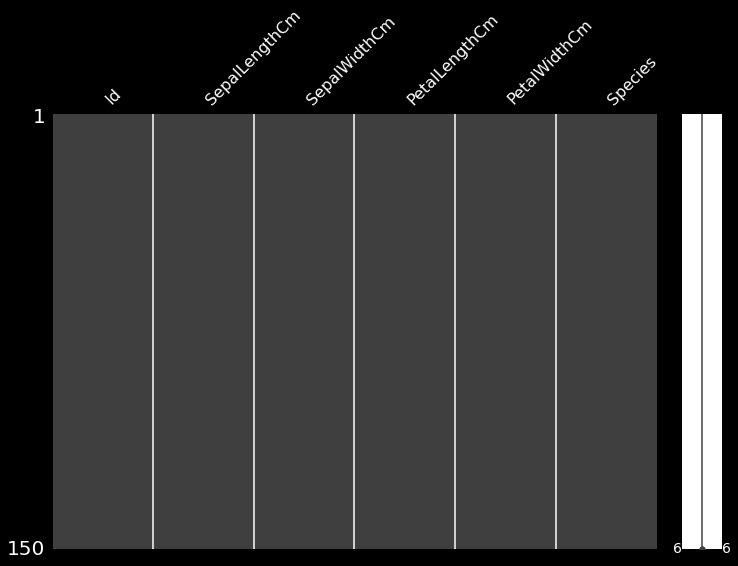

In [ ]:
msno.matrix(df, figsize=(12,8))

In [ ]:
df.drop('Id', axis=1, inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

Text(0.5, 1.0, 'Species Count')

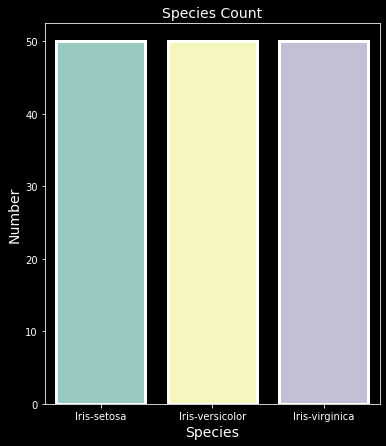

In [ ]:
plt.figure(figsize=(6,7))
sb.countplot(df['Species'], edgecolor="w", lw=3)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Number", fontsize=14)
plt.title("Species Count", fontsize=14)

In [ ]:
df['Species'] = df['Species'].replace({'Iris-versicolor':1, 'Iris-setosa':2, 'Iris-virginica':3}) 

In [ ]:
px.scatter(df, x='PetalLengthCm', y='PetalWidthCm', template='plotly_dark', color='Species')

In [ ]:
px.scatter(df, x='SepalLengthCm', y='SepalWidthCm', template='plotly_dark', color='Species')

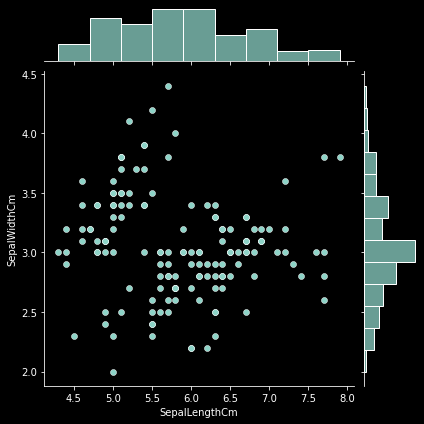

In [ ]:
sb.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df)

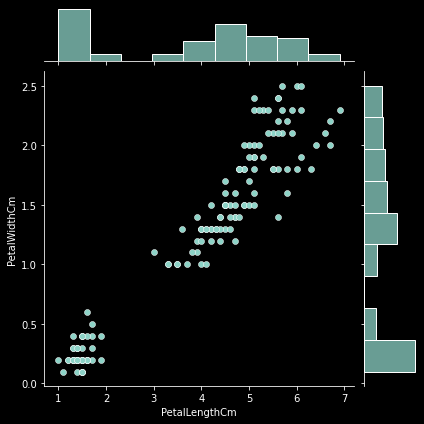

In [ ]:
sb.jointplot(x='PetalLengthCm', y='PetalWidthCm', data=df)

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

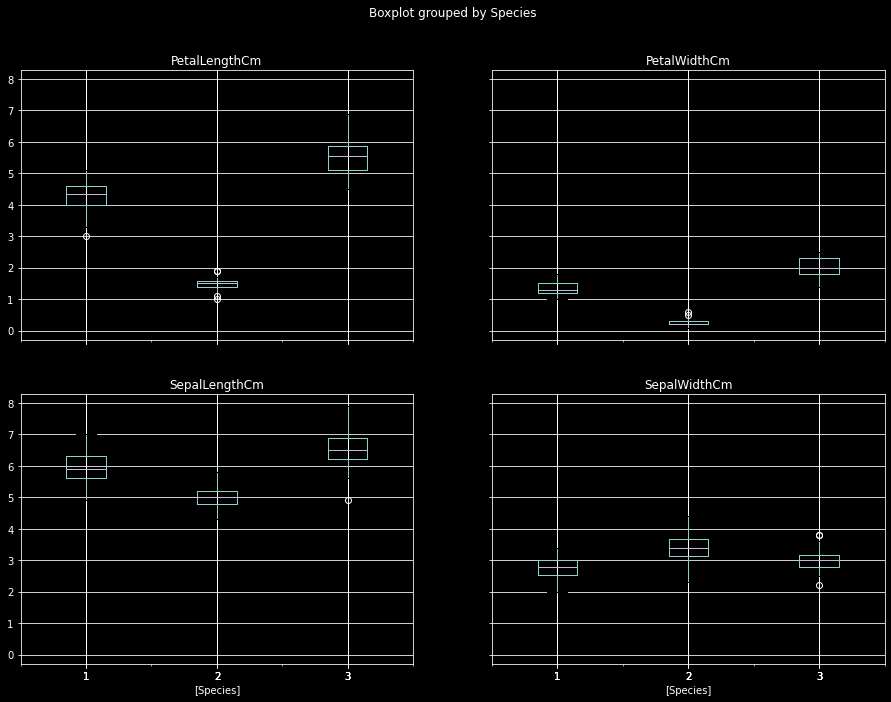

In [ ]:
df.boxplot(by='Species', figsize=(15,11))

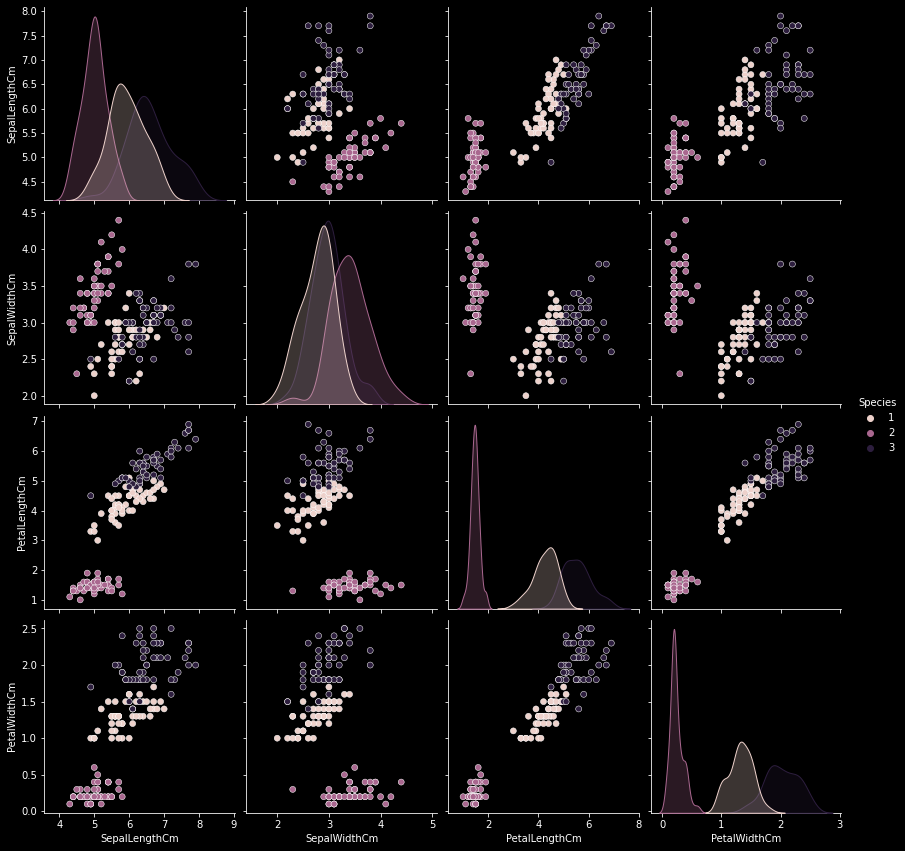

In [ ]:
sb.pairplot(df, hue='Species', size=3)

<AxesSubplot:>

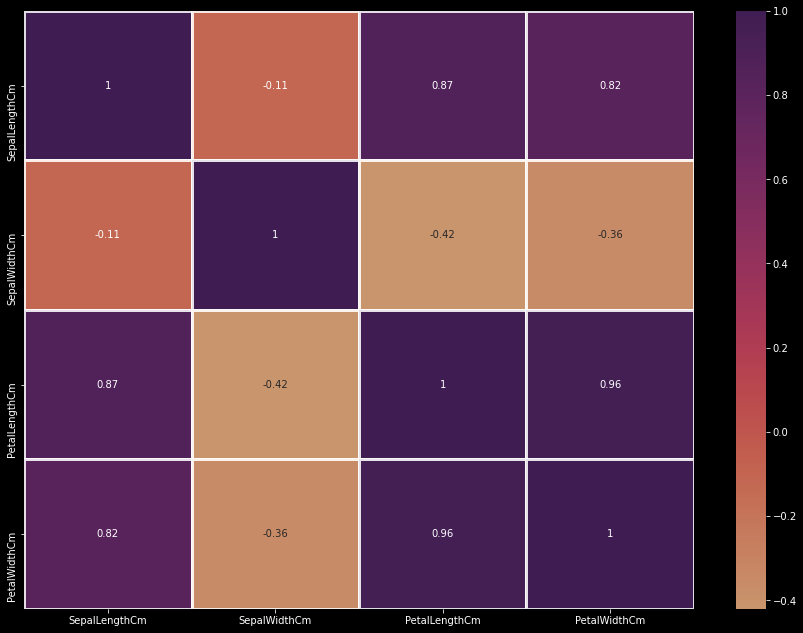

In [ ]:
plt.figure(figsize=(15,11))
sb.heatmap(df.corr(), annot=True, cmap='flare', linewidth=3, alpha=.85)

In [ ]:
x = df.drop('Species', axis=1)

In [ ]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y = df.iloc[:,4]

In [ ]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.70, random_state=42)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(xtrain,ytrain)
prediction = knn_model.predict(xtest)
knn_ac = accuracy_score(prediction,ytest)
print(knn_ac)

1.0


In [ ]:
print(classification_report(prediction,ytest))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



<AxesSubplot:>

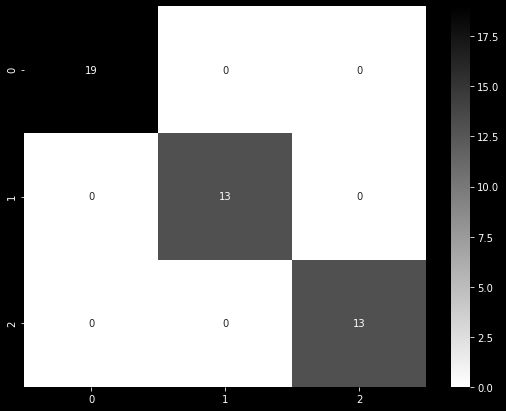

In [ ]:
plt.figure(figsize=(9,7))
sb.heatmap((confusion_matrix(prediction,ytest)), annot=True, cmap='binary')

Text(0.5, 1.0, 'Accuracy Line')

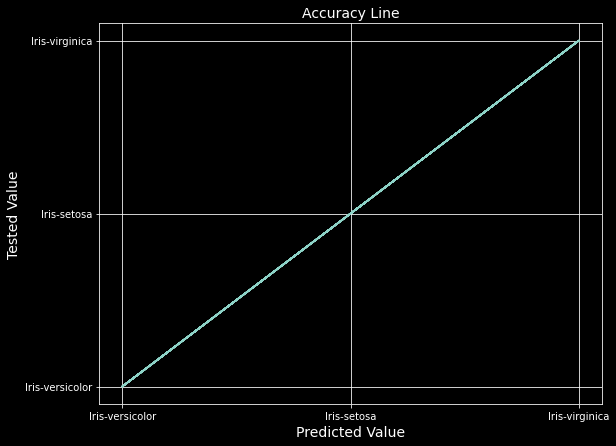

In [ ]:
plt.figure(figsize=(9,7))
plt.plot(prediction,ytest)
plt.grid()
plt.xlabel("Predicted Value", fontsize=14)
plt.ylabel("Tested Value", fontsize=14)
plt.title("Accuracy Line", fontsize=14)